<a href="https://colab.research.google.com/github/Moraw1993/ML_projects/blob/main/Abalone/abalone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest # for detecting outliers
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


from tensorflow.keras.models import Sequential,  Model
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
from tensorflow.keras import Input

# About dataset

## Dataset overview

The Abalone dataset focuses on predicting the age of abalone, a marine mollusk, using physical measurements. Traditionally, determining age involves cutting the shell, staining it, and counting the number of rings under a microscope—a tedious and time-consuming process. This dataset simplifies the task by utilizing easily obtainable measurements to estimate age. Additionally, factors such as weather patterns or location, which influence food availability, could also play a role in solving this problem. The dataset has been preprocessed by removing examples with missing values, particularly where the target value was absent, and continuous variables were scaled for use with artificial neural networks by dividing by 200.

## Variables

| Variable Name  	| Role    	| Type        	| Description                 	| Units 	| Missing Values 	|
|----------------	|---------	|-------------	|-----------------------------	|-------	|----------------	|
| Sex            	| Feature 	| Categorical 	| M, F, and I (infant)        	|       	| No             	|
| Length         	| Feature 	| Continuous  	| Longest shell measurement   	| mm    	| No             	|
| Diameter       	| Feature 	| Continuous  	| Perpendicular to length     	| mm    	| No             	|
| Height         	| Feature 	| Continuous  	| With meat in shell          	| mm    	| No             	|
| Whole_weight   	| Feature 	| Continuous  	| Whole abalone               	| grams 	| No             	|
| Shucked_weight 	| Feature 	| Continuous  	| Weight of meat              	| grams 	| No             	|
| Viscera_weight 	| Feature 	| Continuous  	| Gut weight (after bleeding) 	| grams 	| No             	|
| Shell_weight   	| Feature 	| Continuous  	| After being dried           	| grams 	| No             	|
| Rings          	| Target  	| Integer     	| +1.5 gives the age in years 	|       	| No             	|


## Objective

- **Predictive Modeling** - Develop a regression model to predict the age of abalones based on their physical measurements, aiming to replace the traditional and labor-intensive method of age determination

- **Exploratory Data analysis** - Analyze the realtionships betweend physical attributes (e.g. length, weight) and the age of abalones to identify key predictors and gain bological insights.

- **Feature Importance** - Determine which physical attributes contributes most significantly to predicting age, providing valuable insights for researchers in marine biology

## Additional information...

In this project, the target variable is the number of rings, which serves as a proxy for the age of abalones. To calculate the actual age, we will add 1.5 to the predicted number of rings, as each abalone grows approximately one ring per year after an initial 1.5 years of development. This approach ensures the model's predictions align with biological age estimation practices.


**CITE:**

W. Nash, T. Sellers, S. Talbot, A. Cawthorn, and W. Ford. "Abalone," UCI Machine Learning Repository, 1994. [Online].

Available: https://doi.org/10.24432/C55C7W.




# Loading data

In [33]:
path = "https://raw.githubusercontent.com/Moraw1993/ML_projects/29e8743f78684207f12a87d3ee17dc01fcea73bb/Abalone/abalone.csv"
df = pd.read_csv(path, sep = ',')

scaled_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

df[scaled_columns] = df[scaled_columns] * 200

In [34]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7


# Descriptive statistics

## Information about dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Description for `df.info`

1. Dataset summary:
    - In the abalone dataset we have **4177 entries** and 9 columns.
    - All values are non-null, meaning there are no missing values in the dataset.
2. Categorization of columns by data types:
    - Qualitative:
        - Nominal: `Sex`
        - Oridinal: None
    - Quantitative:
        - Interval: None
        - Ratio: `Length`, `Diameter`, `Height`, `Whole weight`, `Shucked weight`, `Viscera weight`, `Shell weight`, `Rings`
3. Data types in columns:
    - 7 numeric columns of type `float64` (continous variables)
    - 1 numeric column of type `int64` (`Rings` - discrete variable)
    - 1 categorical column of type `object` (`Sex`)



## Descriptive statistics (e.q avg, min, max, sum, percentiles)

In [36]:
print("Numerical statistics:")
stats = df.describe()
stats_with_rsd = pd.concat([stats, (stats.loc['std'] / stats.loc['mean'] * 100).rename('RSD (%)').to_frame().T])

stats_with_rsd.transpose().round(4)


Numerical statistics:


,count,mean,std,min,25%,50%,75%,max,RSD (%)
Length,4177.0,104.7984,24.0186,15.0,90.0,109.0,123.0,163.0,22.9188
Diameter,4177.0,81.5763,19.8480,11.0,70.0,85.0,96.0,130.0,24.3306
Height,4177.0,27.9033,8.3654,0.0,23.0,28.0,33.0,226.0,29.9800
Whole weight,4177.0,165.7484,98.0778,0.4,88.3,159.9,230.6,565.1,59.1727
Shucked weight,4177.0,71.8735,44.3926,0.2,37.2,67.2,100.4,297.6,61.7649
Viscera weight,4177.0,36.1187,21.9229,0.1,18.7,34.2,50.6,152.0,60.6966
Shell weight,4177.0,47.7662,27.8405,0.3,26.0,46.8,65.8,201.0,58.2850
Rings,4177.0,9.9337,3.2242,1.0,8.0,9.0,11.0,29.0,32.4569


### Statistical Significance Description for Each Feature

Every feature has `4177` records, indicating there are no missing values in the dataset.

---

**1. Length**
- **Mean**: 104.7984 – Represents the average length of abalones in millimeters (mm).
- **Std (Standard Deviation)**: 24.0186 – Indicates low variability around the mean.
- **Min**: 15.0 – The smallest recorded length, likely a juvenile or anomaly.
- **25th Percentile**: 90.0 – 25% of abalones have lengths less than 90 mm.
- **Median (50th Percentile)**: 109.0 – The middle value of abalone lengths.
- **75th Percentile**: 123.0 – 75% of abalones are shorter than 123 mm.
- **Max**: 163.0 – The largest recorded length.
- **RSD (%):** 22.92 – Indicates low variability in the data.
- **Shape**: The **median is greater than the mean**, suggesting a **left-skewed distribution** with a longer tail on the left.

---

**2. Diameter**
- **Mean**: 81.5763 – The average diameter of abalones in millimeters (mm).
- **Std (Standard Deviation)**: 19.8480 – Moderate variability around the mean.
- **Min**: 11.0 – The smallest diameter, possibly an anomaly or juvenile.
- **25th Percentile**: 70.0 – 25% of abalones have diameters smaller than 70 mm.
- **Median (50th Percentile)**: 85.0 – The central value of abalone diameters.
- **75th Percentile**: 96.0 – 75% of abalones have diameters less than 96 mm.
- **Max**: 130.0 – The largest recorded diameter.
- **RSD (%):** 24.33 – Indicates consistent data with moderate spread.
- **Shape**: The **median is greater than the mean**, suggesting a **left-skewed distribution**, with more smaller values.

---

**3. Height**
- **Mean**: 27.9033 – The average height of abalones in millimeters (mm).
- **Std (Standard Deviation)**: 8.3654 – Indicates moderate variability around the mean.
- **Min**: 0.0 – Indicates a likely measurement error or anomaly.
- **25th Percentile**: 23.0 – 25% of abalones have heights smaller than 23 mm.
- **Median (50th Percentile)**: 28.0 – The typical height of abalones.
- **75th Percentile**: 33.0 – 75% of abalones have heights under 33 mm.
- **Max**: 226.0 – An unusually large height, possibly an outlier.
- **RSD (%):** 29.98 – Reflects moderate variability in the data.
- **Shape**: The **median is approximately equal to the mean**, suggesting a **symmetric distribution**, though extreme outliers may affect its shape.

---

**4. Whole Weight**
- **Mean**: 165.7484 – Average whole weight of abalones in grams (g).
- **Std (Standard Deviation)**: 98.0778 – Indicates high variability in weight.
- **Min**: 0.4 – Anomalously low weight, possibly an anomaly.
- **25th Percentile**: 88.3 – 25% of abalones weigh less than 88.3 g.
- **Median (50th Percentile)**: 159.9 – The typical abalone weight.
- **75th Percentile**: 230.6 – 75% of abalones weigh less than 230.6 g.
- **Max**: 565.1 – The heaviest abalone recorded.
- **RSD (%):** 59.17 – High variability reflecting size diversity.
- **Shape**: The **mean is greater than the median**, indicating a **right-skewed distribution**, with a longer tail on the right.

---

**5. Shucked Weight**
- **Mean**: 71.8735 – Average weight of abalones without shells in grams (g).
- **Std (Standard Deviation)**: 44.3926 – Indicates significant spread around the mean.
- **Min**: 0.2 – Extremely low weight, likely an anomaly.
- **25th Percentile**: 37.2 – 25% of abalones weigh less than 37.2 g when shucked.
- **Median (50th Percentile)**: 67.2 – The typical weight of shucked abalones.
- **75th Percentile**: 100.4 – 75% of abalones weigh less than 100.4 g.
- **Max**: 297.6 – The heaviest shucked abalone.
- **RSD (%):** 61.76 – High variability in shucked weights.
- **Shape**: The **mean is greater than the median**, suggesting a **right-skewed distribution**.

---

**6. Viscera Weight**
- **Mean**: 36.1187 – Average weight of viscera in grams (g).
- **Std (Standard Deviation)**: 21.9229 – Indicates moderate variability in viscera weight.
- **Min**: 0.1 – A potential anomaly or measurement error.
- **25th Percentile**: 18.7 – 25% of abalones have viscera weights below 18.7 g.
- **Median (50th Percentile)**: 34.2 – Typical viscera weight.
- **75th Percentile**: 50.6 – 75% of abalones have viscera weights under 50.6 g.
- **Max**: 152.0 – The heaviest viscera recorded.
- **RSD (%):** 60.70 – Reflects high variability in viscera measurements.
- **Shape**: The **mean is greater than the median**, indicating a **right-skewed distribution**.

---

**7. Shell Weight**
- **Mean**: 47.7662 – Average shell weight in grams (g).
- **Std (Standard Deviation)**: 27.8405 – Indicates considerable spread in shell weights.
- **Min**: 0.3 – Indicates an unusually light shell, possibly an anomaly.
- **25th Percentile**: 26.0 – 25% of abalones have shell weights less than 26 g.
- **Median (50th Percentile)**: 46.8 – The typical shell weight.
- **75th Percentile**: 65.8 – 75% of abalones have shells weighing less than 65.8 g.
- **Max**: 201.0 – The heaviest shell recorded.
- **RSD (%):** 58.29 – Reflects high variability in shell sizes.
- **Shape**: The **mean is greater than the median**, suggesting a **right-skewed distribution**.

---

**8. Rings (Target Variable)**
- **Mean**: 9.9337 – Average number of rings, representing age + 1.5 years.
- **Std (Standard Deviation)**: 3.2242 – Indicates moderate variability in age.
- **Min**: 1.0 – The youngest abalone.
- **25th Percentile**: 8.0 – 25% of abalones have 8 or fewer rings.
- **Median (50th Percentile)**: 9.0 – Typical number of rings (age ~10.5 years).
- **75th Percentile**: 11.0 – 75% of abalones have 11 or fewer rings.
- **Max**: 29.0 – The oldest recorded abalone.
- **RSD (%):** 32.46 – Moderate variability reflecting a wide age range.
- **Shape**: The **mean is greater than the median**, indicating a **right-skewed distribution**.


In [37]:
print('categorical statistics:')

df.describe(include='object').transpose()

categorical statistics:


,count,unique,top,freq
Sex,4177,3,M,1528


### Statistical Significance Description for Categorical Features

Every feature has `4177` records, indicating there are no missing values in the dataset.

---

**1. Sex**
- **Count**: 4177 – Total number of records in the dataset.
- **Unique**: 3 – There are three unique categories: `M` (Male), `F` (Female), and `I` (Infant).
- **Top**: `M` – The most frequent category is `Male`.
- **Frequency (Freq)**: 1528 – The number of records belonging to the `M` (Male) category.
- **Observation**: The distribution is likely uneven, with `M` (Male) being the dominant category, followed by `F` (Female) and `I` (Infant). A bar chart would likely show a significant difference in category frequencies.


## Split dataset to train and test


In [144]:
#Split the data into training and testing sets

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

## Outlier detection

Isolation forest marked rows as:
anomaly
inlier     3240
outlier     101
Name: count, dtype: int64


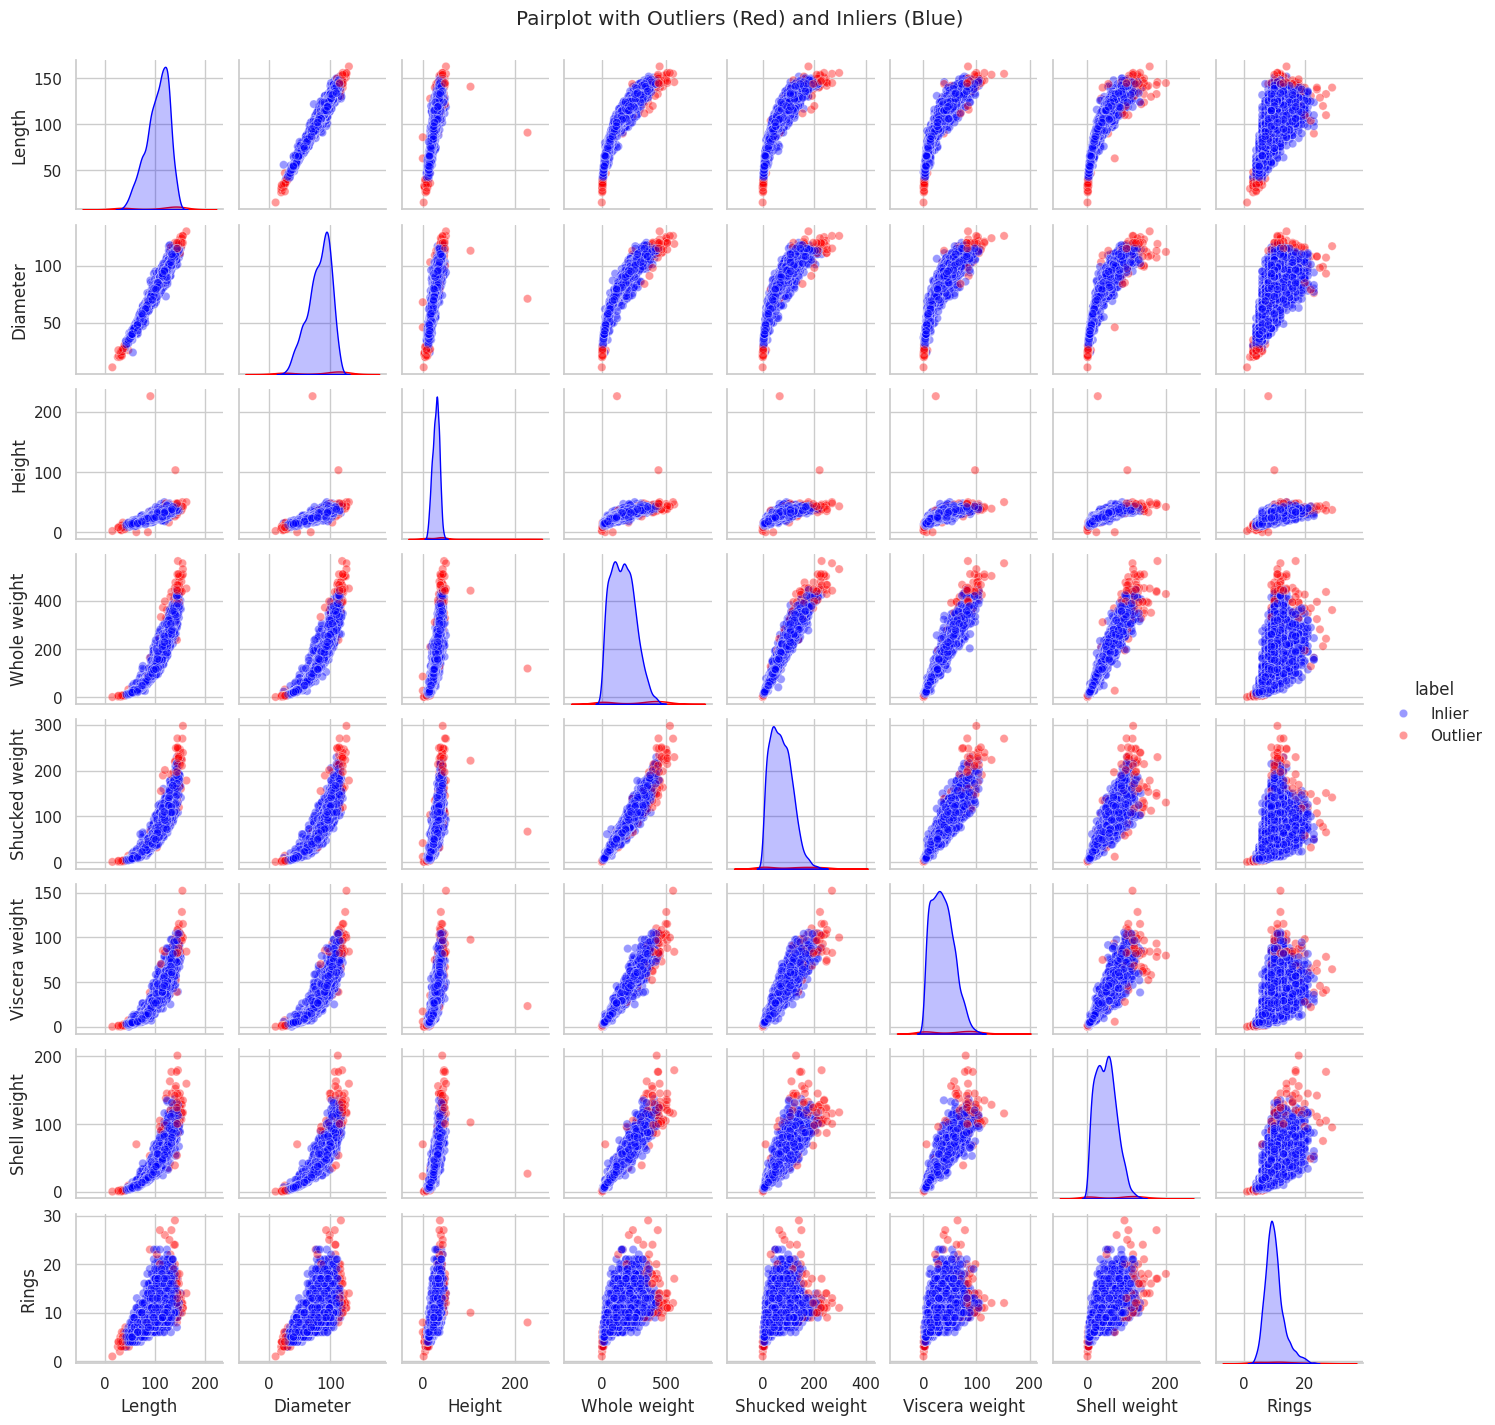

Original train dataset size: 3341
Cleaned train dataset size: 3239


In [145]:
def isolation_forest_anomaly_detection(X_train, contamination=0.03, random_state=42, n_estimators=200, max_samples=0.9):
    # change sex column to onehot coding
    train_data = pd.get_dummies(X_train, columns=['Sex'], drop_first=False, dtype='int')

    # get number colums
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

    # scale data with standarization technique
    scaler = StandardScaler()
    train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

    # build and fit IsolationForest
    isolation_forest = IsolationForest(contamination=0.03, random_state=42, n_estimators=200, max_samples=0.9)
    train_data['anomaly'] = isolation_forest.fit_predict(train_data[numeric_columns])

    # map result to text
    train_data['anomaly'] = train_data['anomaly'].map({1: 'inlier', -1: 'outlier'})

    # copy structure and data
    train_data_original = train_data.copy()

    # inverse scale
    train_data_original[numeric_columns] = scaler.inverse_transform(train_data_original[numeric_columns])

    # restore "sex" column to its pre-transformation state
    sex_dummies = [col for col in train_data_original.columns if col.startswith("Sex_")]
    if sex_dummies:
        train_data_original['Sex'] = train_data_original[sex_dummies].idxmax(axis=1).str.replace('Sex_', '')
        columns = ['Sex'] + [col for col in train_data_original.columns if col != 'Sex']  # Ustaw 'Sex' jako pierwszą kolumnę
        train_data_original = train_data_original[columns]
        train_data_original.drop(columns=sex_dummies, inplace=True)

    return train_data_original

#Visualize results with pairplots
def visualize_outliers(df, columns):
    # Map 'anomaly' to descriptive labels for the legend
    df['label'] = df['anomaly'].map({'inlier': 'Inlier', 'outlier': 'Outlier'})

    sns.pairplot(
        df,
        vars=columns,
        hue='label',  # Use the new label column for the legend
        palette={'Inlier': 'blue', 'Outlier': 'red'},  # Set colors for labels
        plot_kws={'alpha': 0.4},
        height=1.75
    )
    plt.suptitle("Pairplot with Outliers (Red) and Inliers (Blue)", y=1.02)
    plt.show()



def clean_data_with_outliers(X_train) -> pd.DataFrame:

    anomaly_detected = isolation_forest_anomaly_detection(X_train)
    print(f"Isolation forest marked rows as:\n{anomaly_detected['anomaly'].value_counts()}")

    # mark row as outlier if Height == 0
    anomaly_detected.loc[anomaly_detected['Height'] == 0, 'anomaly'] = 'outlier'

    # visualize outliers on the pairplot
    visualize_outliers(anomaly_detected, anomaly_detected.select_dtypes(include='number'))

    # clean outliers
    cleaned_train_data = anomaly_detected[anomaly_detected['anomaly'] == 'inlier'].drop(columns=['anomaly', 'label'])

    # Display results
    print(f"Original train dataset size: {X_train.shape[0]}")
    print(f"Cleaned train dataset size: {cleaned_train_data.shape[0]}")
    return cleaned_train_data

clean_train_data = clean_data_with_outliers(X_train)


In [146]:
X_train_clean = clean_train_data.copy()

# Exploratory Data Analysis

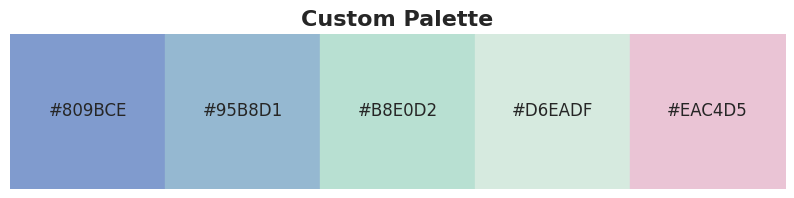

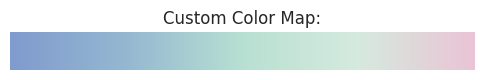

In [41]:
# Colors pallette
custom_palette = ['#809BCE', '#95B8D1', '#B8E0D2', '#D6EADF', '#EAC4D5']

# Ustawienie palety w Seaborn
sns.set_palette(custom_palette)

# Ustawienie stylu
sns.set_theme(style="whitegrid")

# Wyświetlenie palety kolorów
def display_palette(palette):
    plt.figure(figsize=(10, 2))
    for i, color in enumerate(palette):
        plt.fill_between([i, i + 1], 0, 1, color=color)
        plt.text(i + 0.5, 0.5, color, ha='center', va='center', fontsize=12)
    plt.xlim(0, len(palette))
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title("Custom Palette", fontsize=16, fontweight="bold")
    plt.show()

# Wyświetlenie palety
display_palette(custom_palette)

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("my_palette", custom_palette)

# Test the custom colormap by displaying it
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 0.5))
plt.imshow(gradient, aspect='auto', cmap=custom_cmap)
plt.axis('off')
plt.title('Custom Color Map:', fontsize=12)
plt.show()

In [42]:
# set EDA set

eda = X_train_clean.copy()

## Histograms

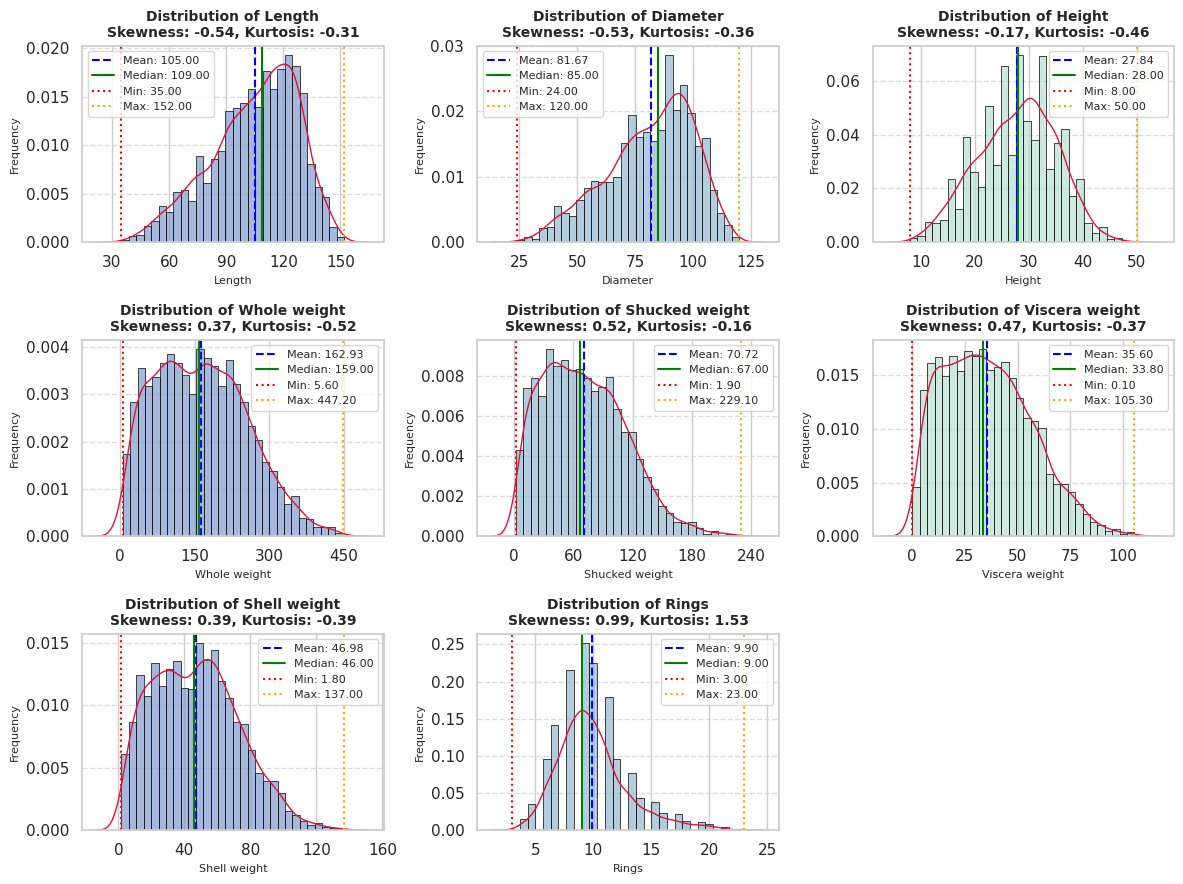

In [43]:
numeric_columns = eda.select_dtypes(include='number').columns.to_list()

num_cols = len(numeric_columns)
n_cols = 3
fig, axes = plt.subplots(nrows = (num_cols + 2) // n_cols, ncols=n_cols, figsize = (12, 3*((num_cols + 2) // n_cols)))

for i, col in enumerate(numeric_columns):
    ax = axes.flat[i]

    # Plot histogram with KDE
    sns.histplot(eda[col], kde=False, bins=30, color=custom_palette[i % len(custom_palette[0:n_cols])], alpha=0.7, ax=ax, edgecolor='black', linewidth=0.5,stat="density")
    sns.kdeplot(eda[col], color='crimson', ax=ax, linewidth=1)

    # Calculate statistics
    mean = eda[col].mean()
    median = eda[col].median()
    skewness = eda[col].skew()
    kurtosis = eda[col].kurt()
    min_val = eda[col].min()
    max_val = eda[col].max()

    # Add vertical lines for mean, median, min, and max
    ax.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    ax.axvline(min_val, color='red', linestyle=':', label=f'Min: {min_val:.2f}')
    ax.axvline(max_val, color='orange', linestyle=':', label=f'Max: {max_val:.2f}')

    # Add title and labels
    ax.set_title(f"Distribution of {col}\nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}", fontsize=10, fontweight='bold')
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Configure x-axis ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

    # Add legend
    ax.legend(fontsize=8, loc='best')

for j in range(i +1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

## Description of histograms:

# Descriptive Analysis of Histogram Transformations

## 1. Length
- **Distribution Statistics**:
  - Skewness: `-0.54`, Kurtosis: `-0.31`
- **Visual Analysis**:
  - The histogram is nearly symmetric with a slight left skew.
- **Recommended Transformation**:
  - **None**. The data is already close to normal.
- **Preprocessing**:
  - Apply **scaling** (e.g., StandardScaler).

---

## 2. Diameter
- **Distribution Statistics**:
  - Skewness: `-0.53`, Kurtosis: `-0.36`
- **Visual Analysis**:
  - The histogram is nearly symmetric with minor left skewness.
- **Recommended Transformation**:
  - **None**. The data is already close to normal.
- **Preprocessing**:
  - Apply **scaling** (e.g., StandardScaler).

---

## 3. Height
- **Distribution Statistics**:
  - Skewness: `-0.17`, Kurtosis: `-0.46`
- **Visual Analysis**:
  - The histogram is close to symmetric with no significant skewness or tail.
- **Recommended Transformation**:
  - **None**. The data is already symmetric.
- **Preprocessing**:
  - Apply **scaling** (e.g., MinMaxScaler or StandardScaler).

---

## 4. Whole weight
- **Distribution Statistics**:
  - Skewness: `0.37`, Kurtosis: `-0.52`
- **Visual Analysis**:
  - The histogram shows a slight right skew. Square root transformation provides better normalization than logarithmic transformation.
- **Recommended Transformation**:
  - **Square Root Transformation** to reduce skewness without over-compressing the range.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 5. Shucked weight
- **Distribution Statistics**:
  - Skewness: `0.52`, Kurtosis: `-0.16`
- **Visual Analysis**:
  - The histogram shows minor right skewness. The square root transformation preserves variability better than logarithmic transformation.
- **Recommended Transformation**:
  - **Square Root Transformation** for minor skew correction.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 6. Viscera weight
- **Distribution Statistics**:
  - Skewness: `0.47`, Kurtosis: `-0.37`
- **Visual Analysis**:
  - The histogram shows slight right skewness. Both square root and logarithmic transformations reduce skewness effectively, but square root preserves the natural variability better.
- **Recommended Transformation**:
  - **Square Root Transformation** for normalization.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 7. Shell weight
- **Distribution Statistics**:
  - Skewness: `0.39`, Kurtosis: `-0.39`
- **Visual Analysis**:
  - The histogram shows slight right skewness. Square root transformation normalizes the data well.
- **Recommended Transformation**:
  - **Square Root Transformation** to reduce skewness while maintaining variability.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 8. Rings
- **Distribution Statistics**:
  - Skewness: `0.99`, Kurtosis: `1.53`
- **Visual Analysis**:
  - The histogram shows significant right skewness. Logarithmic transformation handles the long tail more effectively than square root transformation.
- **Recommended Transformation**:
  - **Logarithmic Transformation** to handle the severe skewness.
- **Preprocessing**:
  - After the logarithmic transformation, apply **scaling** (e.g., StandardScaler).

---

## Summary of Recommended Transformations

| Feature            | Skewness | Transformation          | Preprocessing                 |
|---------------------|----------|-------------------------|-------------------------------|
| **Length**          | -0.54    | None                    | Scaling (StandardScaler)      |
| **Diameter**        | -0.53    | None                    | Scaling (StandardScaler)      |
| **Height**          | -0.17    | None                    | Scaling (StandardScaler)      |
| **Whole weight**    | 0.37     | Square root             | Scaling (StandardScaler)      |
| **Shucked weight**  | 0.52     | Square root             | Scaling (StandardScaler)      |
| **Viscera weight**  | 0.47     | Square root             | Scaling (StandardScaler)      |
| **Shell weight**    | 0.39     | Square root             | Scaling (StandardScaler)      |
| **Rings**           | 0.99     | Logarithmic             | Scaling (StandardScaler)      |

---

## Why Square Root Over Logarithmic Transformation for Some Features?
1. **Square Root Benefits**:
   - Compresses high values less aggressively than logarithmic transformation, preserving variability.
   - Ideal for features with mild to moderate skewness.

2. **Logarithmic Transformation Limitations**:
   - Over-compression can result in loss of meaningful variability, especially for distributions with minor skewness.


In [44]:
custom_palette[0:5:2]

['#809BCE', '#B8E0D2', '#EAC4D5']

## Distribution of abalones by Sex

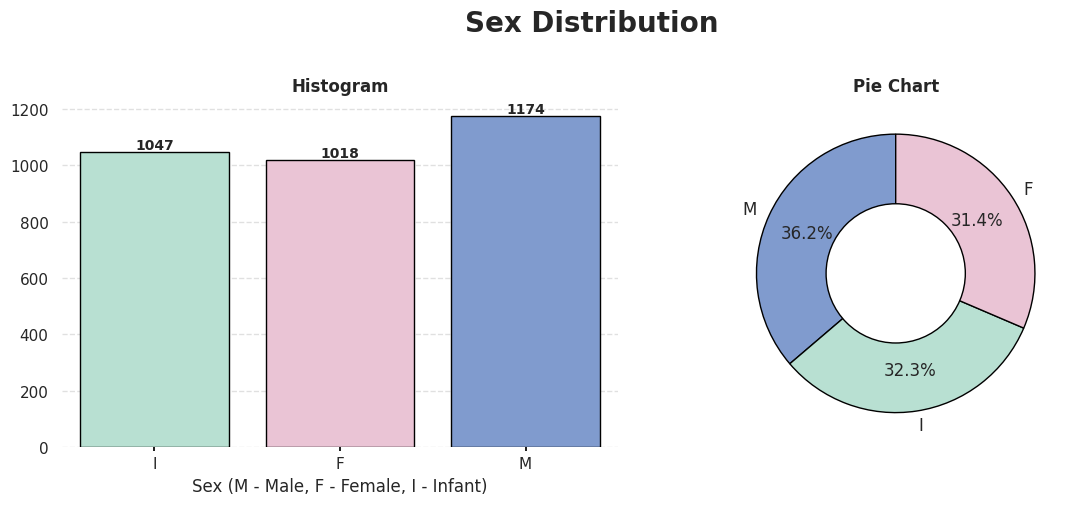

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define the custom palette
palette = {'F': custom_palette[-1], 'M': custom_palette[0], 'I': custom_palette[2]}

# Histogram (Bar Chart)
sns.countplot(
    x='Sex',
    data=eda,
    ax=axes[0],
    palette=palette,
    edgecolor='black',
    saturation=1,
    hue='Sex'
)
for container in axes[0].containers:
    axes[0].bar_label(container, fontweight='bold', fontsize=10)

axes[0].set_title("Histogram", fontweight='bold', fontsize=12)
axes[0].set_xlabel("Sex (M - Male, F - Female, I - Infant)")
axes[0].set_ylabel("")
axes[0].spines[:].set_visible(False)
axes[0].tick_params(axis='x', which='major', length=3, color='black', bottom=True)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Pie Chart
sex_counts = eda['Sex'].value_counts()  # Count occurrences of each Sex category
colors = [palette['M'], palette['I'],palette['F']]  # Map the colors from the palette
axes[1].pie(
    sex_counts,
    labels=sex_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.7,
    colors=colors,  # Pass the list of colors
    wedgeprops=dict(edgecolor='black', alpha=1),
    textprops=dict(fontsize=12)
)

# Add a circle for a donut chart
centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor='black')
axes[1].add_artist(centre_circle)

axes[1].set_title('Pie Chart', fontweight='bold', fontsize=12)

# Title for the overall figure
plt.suptitle("Sex Distribution", fontsize=20, fontweight='bold', va='center', ha='center')
plt.tight_layout()
plt.show()


**Histogram Analysis**: The bar chart on the left illustrates the absolute counts for each group:

- Male (M): 1,174 individuals (highest count),
- Female (F): 1,018 individuals,
- Infant (I): 1,047 individuals.

---

**Pie Chart Insights**: The donut chart on the right highlights the proportional distribution of these categories:

- Male: 36.6%,
- Female: 32.1%,
- Infant: 31.3%.

**Key Observation:** While males form the largest group, the distribution between females and infants is nearly balanced, indicating a relatively even spread across categories.

In [46]:
def distribution_by_sex(df, feature_name, discrete=False):
    """
    Function to plot the distribution and boxplot of a feature grouped by 'Sex'.

    Parameters:
    - df: pandas DataFrame, dataset to analyze.
    - feature_name: str, name of the feature to plot.
    - discrete: bool, if the feature is discrete (for histogram adjustment).
    """
    # Custom palette for 'Sex'
    palette = {'F': custom_palette[-1], 'M': custom_palette[0], 'I': custom_palette[2]}

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram for the passed feature by Sex
    sns.histplot(
        data=df,
        hue='Sex',
        x=feature_name,
        multiple='layer',
        ax=axes[0],
        bins=30,
        palette=palette,  # Updated to use the custom palette
        kde=True,
        edgecolor='black',
        linewidth=0.85,
        discrete=discrete,
    )
    axes[0].set_title(f"Distribution of {feature_name} by Sex", fontweight='bold', fontsize=12)
    axes[0].set_xlabel(feature_name)
    axes[0].set_ylabel("Frequency")
    axes[0].grid(axis='both', alpha=0.6, linestyle='--')
    axes[0].spines[:].set_visible(False)

    # Boxplot for the passed feature by Sex
    sns.boxplot(
        data=df,
        hue='Sex',
        y=feature_name,
        ax=axes[1],
        palette=palette,  # Updated to use the custom palette
        dodge=True,
        gap=0.2,
        legend=False
    )
    axes[1].set_title(f"Boxplot of {feature_name} by Sex", fontweight='bold', fontsize=12)
    axes[1].set_xlabel("Sex")
    axes[1].set_ylabel(feature_name)
    axes[1].grid(axis='y', alpha=0.6, linestyle='--')
    axes[1].spines[:].set_visible(False)

    plt.tight_layout()
    plt.show()

### Distribution Rings By Sex


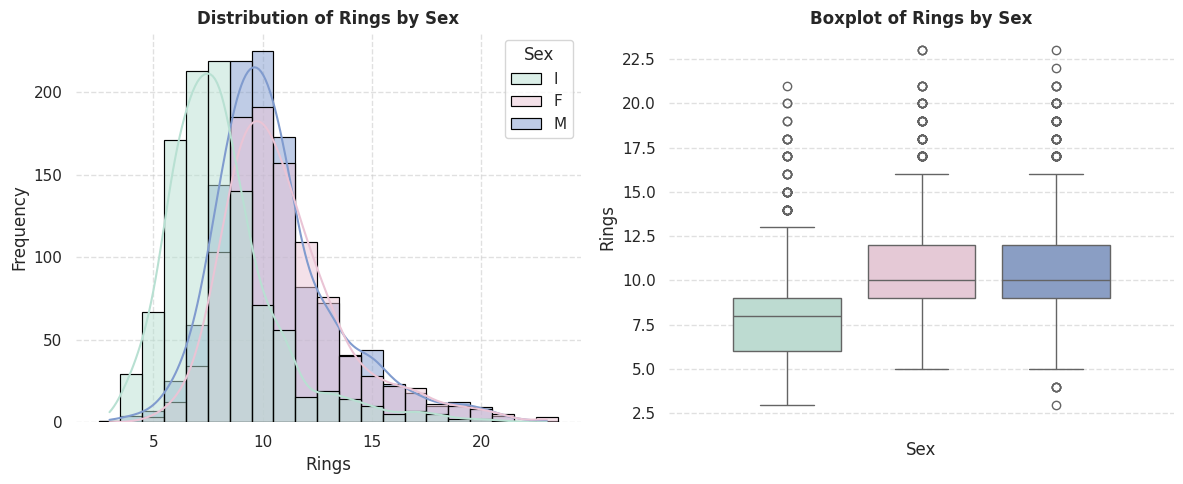

In [47]:
distribution_by_sex(eda, 'Rings', discrete=True)

**Rings distribution insight** :

- Males and females have higher medians and greater variability in "Rings" compared to immature individuals, whose median is around 7 with a smaller range.
- Outliers are prominent in both males and females, suggesting potential biological or environmental factors influencing higher "Rings" counts.
- The distributions for males and females are more dispersed, while immature individuals are concentrated in lower "Rings" values.

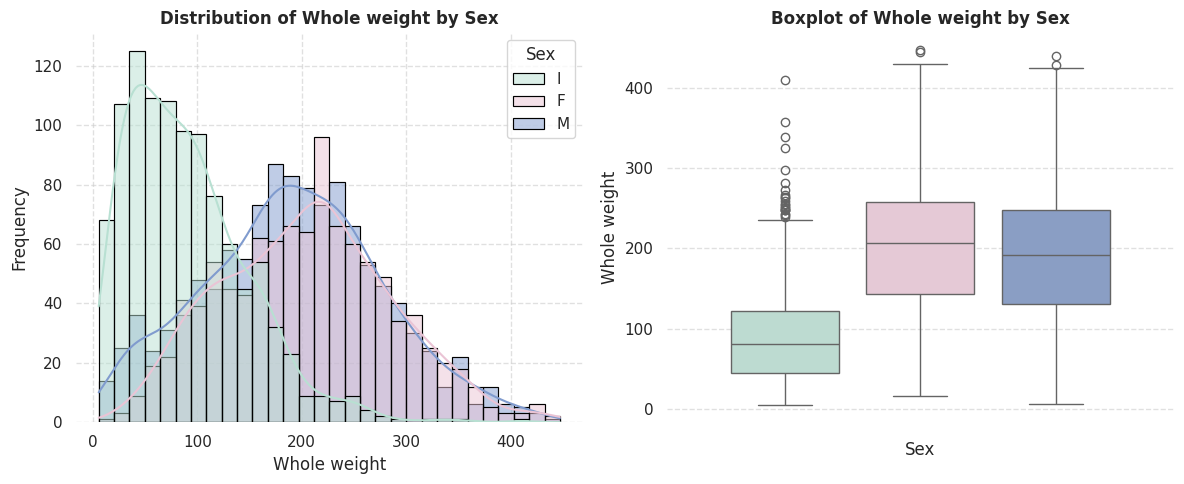

In [48]:
distribution_by_sex(eda, 'Whole weight', discrete=False)

**Whole weight insight**:

- Males and females have higher median "Whole weight" values and wider distributions compared to immature individuals, whose median and weights are much lower.
- Outliers are common in all groups, especially among males and females, showing some individuals with much higher weights.
- Immature individuals are concentrated in lower weight ranges (50–100), while males and females show more variation and overlap

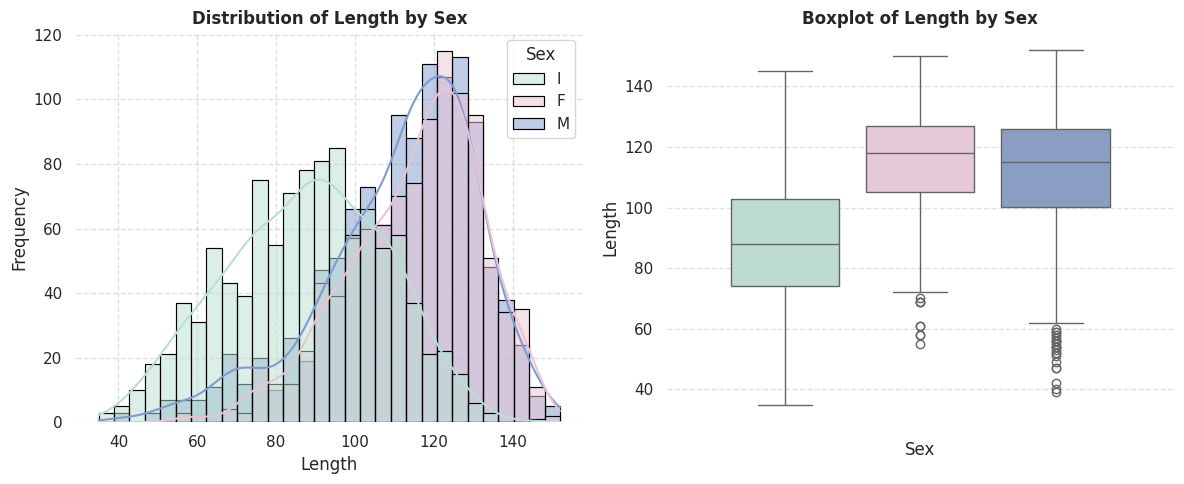

In [49]:
distribution_by_sex(eda, 'Length', discrete=False)

**Length insight**:

- Males and females have higher median "Length" values compared to immature individuals, who have smaller lengths and a narrower range.
- Outliers are more prominent among immature individuals, with a few having significantly lower lengths, while males and females show more consistent distributions.
- The distributions of males and females overlap, peaking around 120, while immature individuals are concentrated in lower ranges (around 80–100).

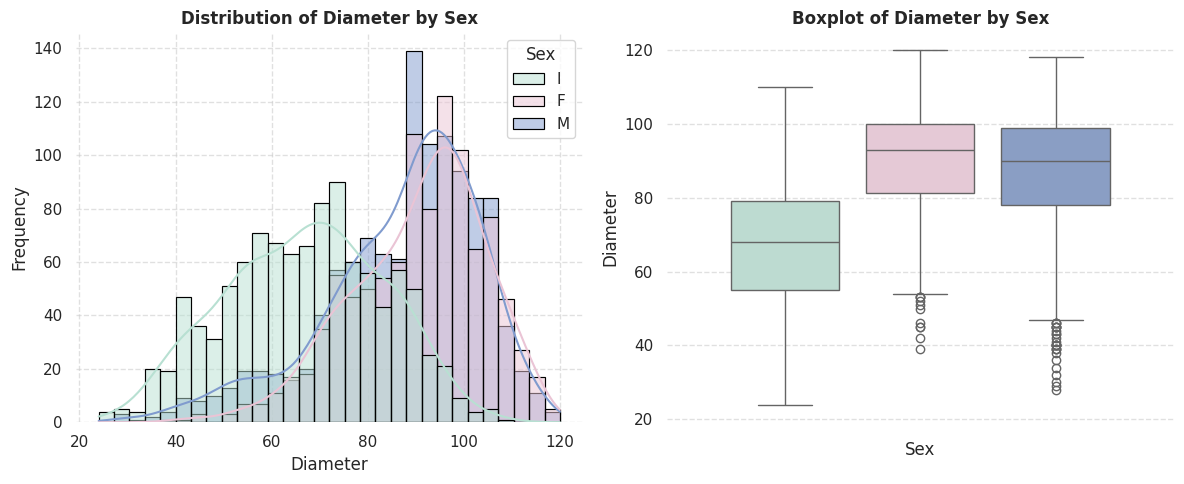

In [50]:
distribution_by_sex(eda, 'Diameter', discrete=False)

**Diameter insight**:

- Males and females have higher median "Diameter" values compared to immature individuals, who show smaller diameters and a narrower range.
- Outliers are most frequent in the immature group, with numerous individuals having significantly smaller diameters, while males and females display more uniform distributions.
- The distributions of males and females overlap, peaking around 90–100, while immature individuals are concentrated in lower ranges (around 60–80).

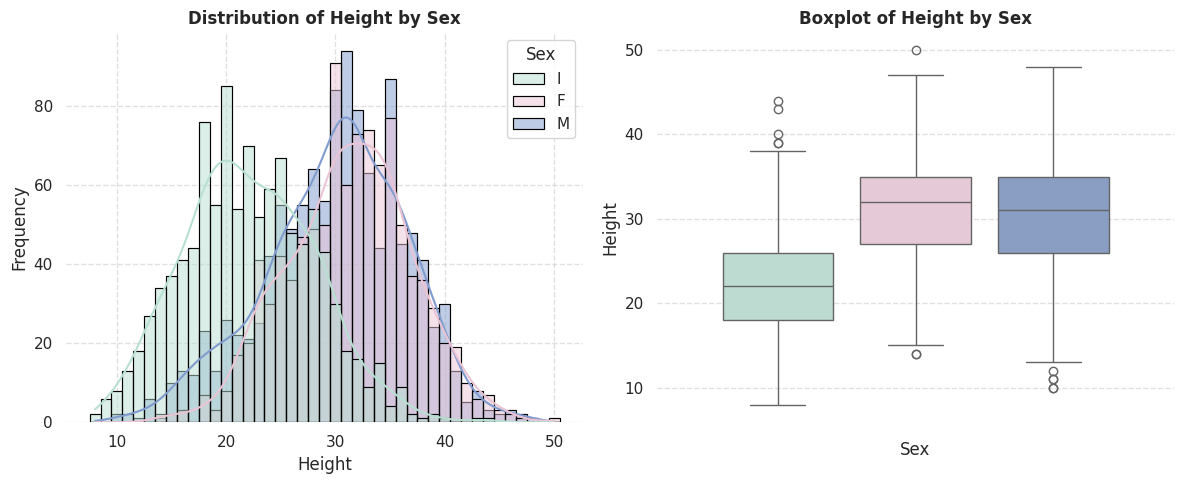

In [51]:
distribution_by_sex(eda, 'Height', discrete=True)

**Height insight**:

- Males and females exhibit higher median "Height" values compared to immature individuals, who have lower heights and a narrower range.
- Outliers are observed in all groups, but they are more prominent among immature individuals and males, with some significantly smaller or larger heights.
- The distributions of males and females overlap, peaking around 30–35, while immature individuals are concentrated in lower ranges (around 20–25).

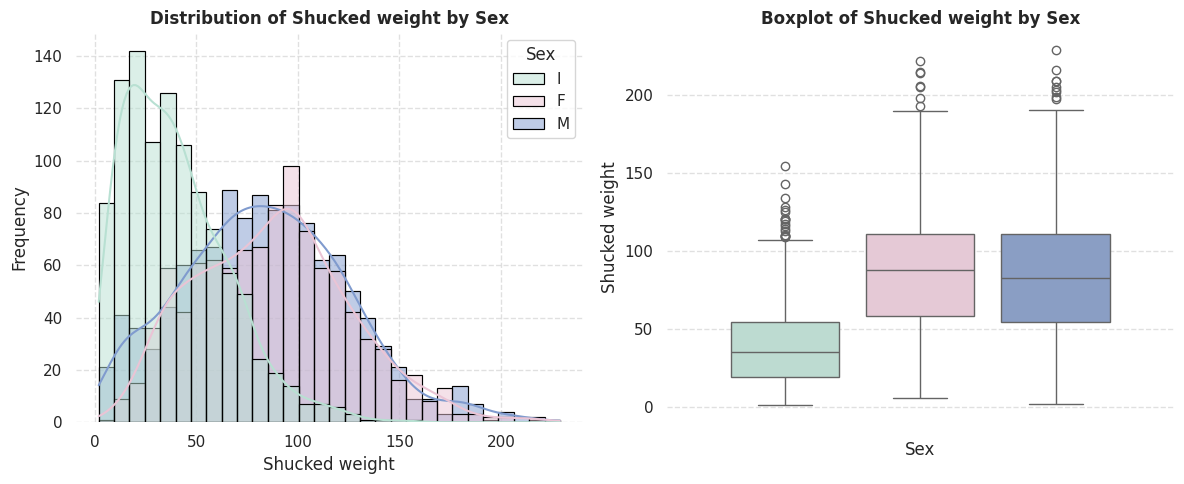

In [52]:
distribution_by_sex(eda, 'Shucked weight', discrete=False)

**Shucked weight insight**:

- Males and females have higher median "Shucked weight" values compared to immature individuals, whose median and overall weight distributions are much lower.
- Outliers are present across all groups, but they are particularly frequent among males and females, with some individuals showing significantly higher weights.
- Immature individuals are concentrated in the lower weight range (0–50), while males and females have wider distributions and greater overlap, with their weights generally spanning 50–150.
- The boxplot highlights that males and females have similar interquartile ranges (IQR), but males exhibit a slightly broader range of higher values.


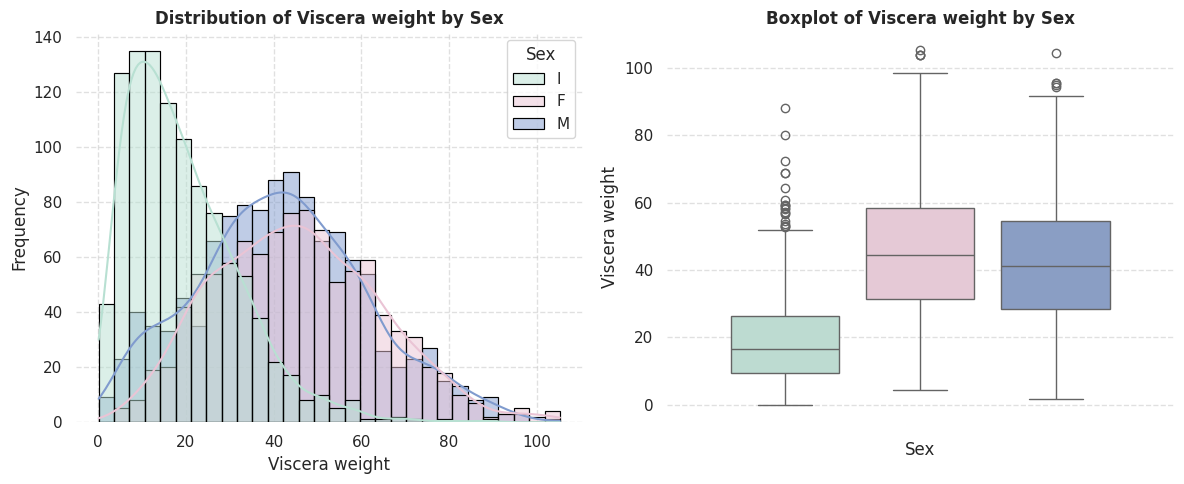

In [53]:
distribution_by_sex(eda, 'Viscera weight', discrete=False)

**Viscera weight insight**:

- Males and females exhibit higher median "Viscera weight" values compared to immature individuals, whose median and overall weight distributions are concentrated in the lower range (0–30).
- Outliers are present across all groups, with males and females showing more extreme values in the higher weight range (above 80).
- Immature individuals are predominantly clustered around lower weights (0–20), with minimal overlap with males and females.
- The boxplot indicates that males and females have comparable interquartile ranges (IQR), with males slightly exceeding females in the spread of higher weights. Immature individuals display a much narrower range and lower values overall.


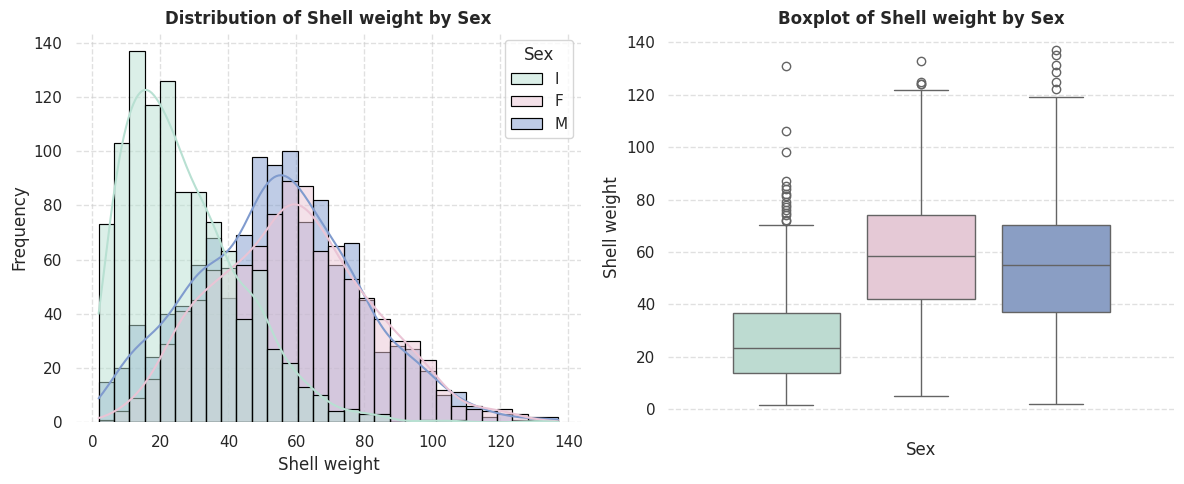

In [54]:
distribution_by_sex(eda, 'Shell weight', discrete=False)

**Shell weight insight** :

- Males and females have significantly higher median "Shell weight" values compared to immature individuals, whose median and overall weight distributions are concentrated in the lower range (0–30).
- Outliers are evident in all groups, particularly among males and females, with several individuals showing extreme values above 100.
- Immature individuals are clustered in the lower weight range (0–20), while males and females show greater overlap and wider distributions, primarily spanning 30–80.
- The boxplot highlights that males have a slightly broader interquartile range (IQR) and higher maximum values compared to females, while immature individuals display a much narrower range and lower overall weights.

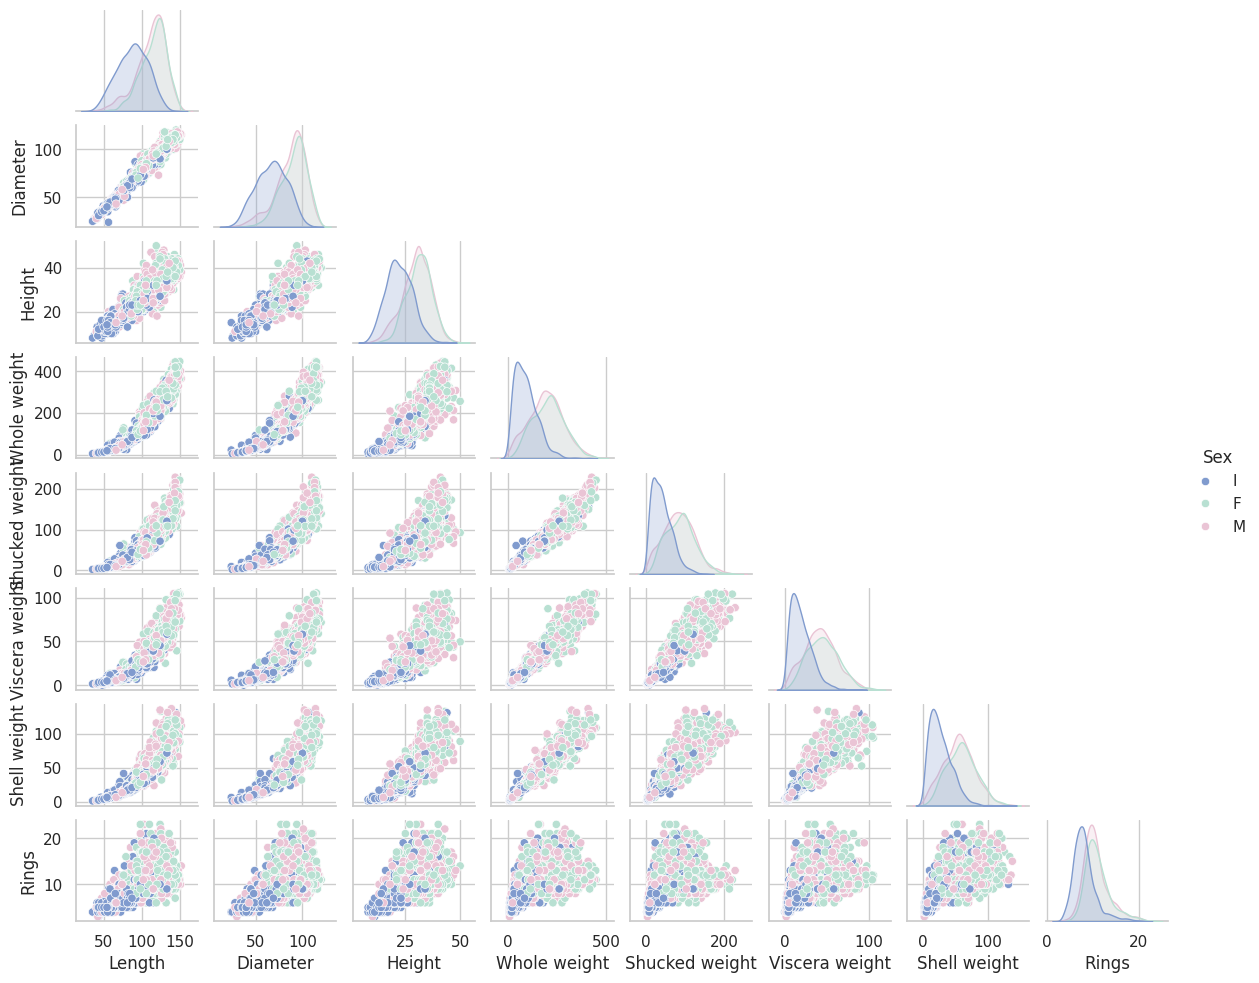

In [55]:
sns.pairplot(eda, hue='Sex', palette=[custom_cmap(i/2) for i in range(3)], diag_kind='kde', corner=True, height=1.25, aspect=1.2)
plt.show()

**Insight**:

1. **Strong Positive Correlations Between Dimensions and Weights:**

- Features like Length, Diameter, and Height are strongly correlated with Whole weight, Shucked weight, Viscera weight, and Shell weight. Larger abalones tend to have higher weights, which aligns with biological expectations.

2. **Weaker Correlation Between Features and Rings:**

- Compared to the strong relationships between dimensions and weights, the correlation between Rings (age) and other features is noticeably weaker. This suggests that predicting Rings may require non-linear modeling techniques or additional derived features.

3. **Sex-Based Clustering:**

- Immature individuals (I) are concentrated in the lower ranges for most features, particularly Length and weights, while males (M) and females (F) occupy overlapping but higher-value ranges. This clustering indicates that Sex is a key factor influencing these features.

4. **Non-Uniform Distribution of Rings:**

- While males and females show overlapping distributions across most features, immature individuals generally have fewer Rings (lower age) and smaller physical dimensions, making Sex an important predictor for age-related modeling.

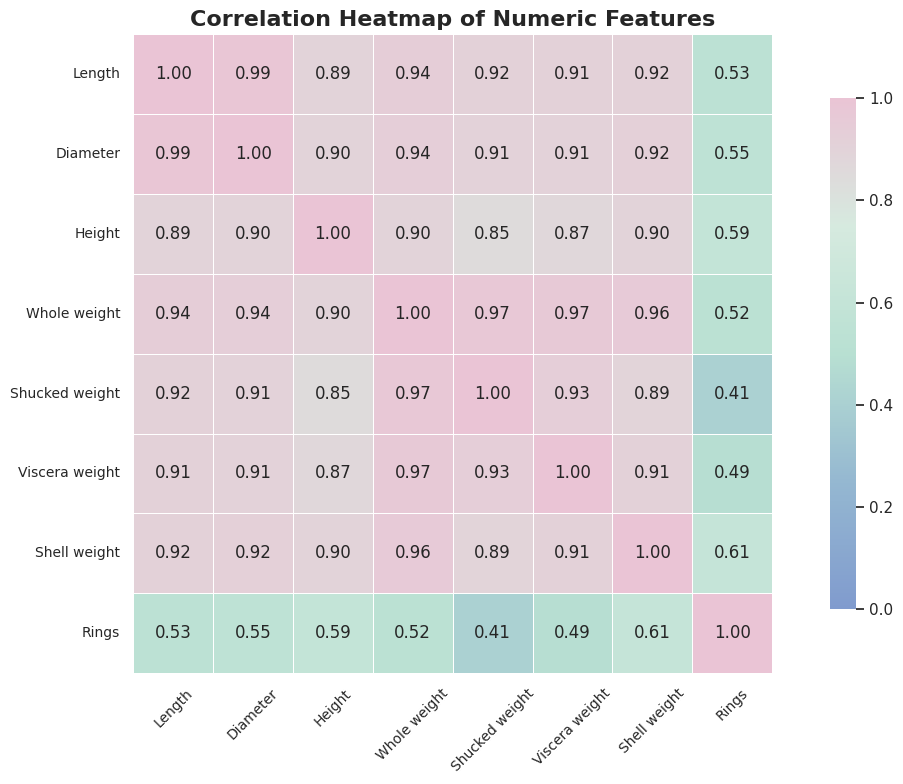

In [56]:
# Function to create a beautiful heatmap for numeric features
def create_heatmap(data, title="Correlation Heatmap", figsize=(12, 8), cmap="coolwarm"):
    """
    Create a heatmap for numeric features in the dataset.

    Parameters:
    - data: pandas DataFrame, dataset for analysis.
    - title: str, title for the heatmap.
    - figsize: tuple, size of the heatmap figure.
    - cmap: str, colormap to use for the heatmap.
    """
    # Calculate the correlation matrix for numeric features
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    corr_matrix = numeric_data.corr()

    # Create the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap=custom_cmap,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        square=True,
        vmin=0,
        vmax=1
    )
    plt.title(title, fontweight='bold', fontsize=16)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Example usage
create_heatmap(eda, title="Correlation Heatmap of Numeric Features")


**Key observation of heatmap**:

1. High Correlations Among Physical Dimensions and Weights:
    - Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, and Shell weight are strongly correlated with each other (correlation > 0.85). This is expected, as larger abalones tend to have heavier weights.
2. Rings Correlation:
    - The correlation of Rings with other features is moderate:
        - Highest correlation: Shell weight (0.61).
        - Lowest correlation: Shucked weight (0.41).
    - This indicates that while weight and size features provide some information about age, they are not strongly predictive individually.
3. Redundant Features:
    - Features such as Length and Diameter (0.99 correlation) are nearly identical, suggesting potential redundancy.
    - Similarly, the weights (Whole weight, Shucked weight, Viscera weight, Shell weight) also show high correlations, which could benefit from dimensionality reduction (e.g., PCA) or feature selection.
4. Symmetry:
    - The heatmap is symmetric, as correlations between features are bidirectional (e.g., Corr(Length, Diameter) = Corr(Diameter, Length)).

# Preprocessing

In [147]:
# Corrected function for column ratios
def column_ratio(X):
    return X[:, [0]] / (X[:, [1]] + 1e-6)

def ratio_name(transformer, feature_names_in):
    return ['ratio']

# Corrected function for volume
def calculate_volume(X):
    return np.expand_dims(X[:, 0] * X[:, 1] * X[:, 2], axis=1)

def volume_name(transformer, feature_names_in):
    return ["Column"]

# Pipelines for transformations
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

def volume_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(calculate_volume, feature_names_out=volume_name),
        StandardScaler()
    )

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
        StandardScaler()
    )

def sqrt_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
        StandardScaler()
    )

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# Define column groups
sqrt_columns = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
log_columns = ['Rings']
categorical_columns = ['Sex']
numeric_columns = ['Length', 'Diameter', 'Height']

# ColumnTransformer with explicit steps for numeric columns
preprocessing = ColumnTransformer([
    ("log", log_pipeline(), log_columns),  # Log transformation
    ("sqrt", sqrt_pipeline(), sqrt_columns),  # Square root transformation
    ("numeric_scaler", default_num_pipeline, numeric_columns),  # Explicit scaling for numeric columns
    ("length_to_height", ratio_pipeline(), ["Length", "Height"]),  # Ratio: Length to Height
    ("diameter_to_height", ratio_pipeline(), ["Diameter", "Height"]),  # Ratio: Diameter to Height
    ("whole_to_shucked", ratio_pipeline(), ["Whole weight", "Shucked weight"]),  # Ratio: Whole weight to Shucked weight
    ("whole_to_viscera", ratio_pipeline(), ["Whole weight", "Viscera weight"]),  # Ratio: Whole weight to Viscera weight
    ("volume", volume_pipeline(), ["Length", "Diameter", "Height"]),  # Volume calculation
    ("onehot", make_pipeline(SimpleImputer(strategy="most_frequent"),
                              OneHotEncoder(drop="first", handle_unknown='ignore', sparse_output=False)), categorical_columns)  # Categorical encoding
], remainder="passthrough")  # Pass remaining columns as is

In [168]:
processed_train_data = preprocessing.fit_transform(X_train_clean)
processed_test_data = preprocessing.fit_transform(X_test)
preprocessing.get_feature_names_out()

array(['log__Rings', 'sqrt__Whole weight', 'sqrt__Shucked weight',
       'sqrt__Viscera weight', 'sqrt__Shell weight',
       'numeric_scaler__Length', 'numeric_scaler__Diameter',
       'numeric_scaler__Height', 'length_to_height__ratio',
       'diameter_to_height__ratio', 'whole_to_shucked__ratio',
       'whole_to_viscera__ratio', 'volume__Column', 'onehot__Sex_I',
       'onehot__Sex_M'], dtype=object)

In [169]:
X_train_processed = pd.DataFrame(processed_train_data, columns=preprocessing.get_feature_names_out(), index=X_train_clean.index)
X_test_processed = pd.DataFrame(processed_test_data, columns=preprocessing.get_feature_names_out(), index=X_test.index)

In [60]:
X_test_processed

,log__Rings,sqrt__Whole weight,sqrt__Shucked weight,sqrt__Viscera weight,sqrt__Shell weight,numeric_scaler__Length,numeric_scaler__Diameter,numeric_scaler__Height,length_to_height__ratio,diameter_to_height__ratio,whole_to_shucked__ratio,whole_to_viscera__ratio,volume__Column,onehot__Sex_I,onehot__Sex_M
866,-0.145539,0.659557,0.440822,1.063739,0.715954,0.685942,0.489895,0.554111,-0.067319,-0.147856,0.700648,-1.316377,0.475910,0.0,1.0
1483,-0.506499,0.263088,0.305417,0.454385,0.225755,0.564740,0.341935,0.297328,0.040245,-0.065849,-0.346451,-0.795636,0.229079,0.0,1.0
599,1.672366,0.455116,-0.048005,0.526682,0.772758,0.322336,0.391255,1.452852,-0.710550,-0.662053,2.400751,-0.388087,0.695950,0.0,0.0
1702,-0.145539,0.907146,0.870952,0.829343,1.018465,0.928346,0.835134,0.810894,-0.099822,-0.112518,-0.094838,0.087875,0.903972,0.0,0.0
670,1.243564,-0.241923,-0.389657,-0.509112,0.021527,-0.364476,-0.200583,0.168936,-0.424765,-0.320486,0.719268,1.375003,-0.371707,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0.479085,-0.012291,-0.061786,-0.022330,0.159145,-0.000870,0.243296,0.297328,-0.289815,-0.126878,0.099313,-0.057791,-0.032066,0.0,0.0
1651,-0.506499,0.312838,0.427142,0.087883,0.355017,0.605140,0.292616,0.297328,0.063821,-0.096364,-0.628729,0.821079,0.223457,0.0,0.0
2897,0.180988,0.015521,0.161790,-0.017840,-0.028142,0.201133,0.243296,0.297328,-0.171936,-0.126878,-0.773602,0.038979,0.045915,1.0,0.0
3953,-0.506499,-0.323351,-0.287378,-0.695636,-0.205118,-0.445277,-0.496503,-0.473022,-0.001012,-0.042963,-0.283763,2.194714,-0.696102,1.0,0.0


# Build model

In [170]:
# split X , y

X_train_processed, y_train_processed = X_train_processed.drop(columns=['log__Rings']), X_train_processed['log__Rings']
X_test_processed, y_test_processed = X_test_processed.drop(columns=['log__Rings']), X_test_processed['log__Rings']

In [171]:
def inverse_transform_target(y_scaled, preprocessing_pipeline, log_column):
    """
    Odwrotne skalowanie i logarytmiczna transformacja zmiennej celu.

    Args:
    - y_scaled: Dane po skalowaniu i logarytmicznej transformacji.
    - preprocessing_pipeline: Pipeline ColumnTransformer używany do przetwarzania.
    - log_column: Nazwa kolumny, która była przekształcona logarytmicznie.

    Returns:
    - Dane po odwrotnym przetworzeniu.
    """
    # Pobierz StandardScaler z log_pipeline
    scaler = preprocessing_pipeline.named_transformers_['log'][-1]  # StandardScaler z log_pipeline
    y_unscaled = scaler.inverse_transform(y_scaled.values.reshape(-1, 1))  # Odwrotne skalowanie

    # Odwrócenie log1p -> exp(x) - 1
    y_inverse = np.expm1(y_unscaled)
    return y_inverse.flatten()

Epoch 1/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 1.0335 - mae: 0.7873 - mse: 1.0335 - r2: 5.5753e-04 - val_loss: 0.9882 - val_mae: 0.7513 - val_mse: 0.9882 - val_r2: 0.0118
Epoch 2/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.0020 - mae: 0.7747 - mse: 1.0020 - r2: 0.0140 - val_loss: 0.9764 - val_mae: 0.7462 - val_mse: 0.9764 - val_r2: 0.0236
Epoch 3/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9832 - mae: 0.7654 - mse: 0.9832 - r2: 0.0252 - val_loss: 0.9624 - val_mae: 0.7399 - val_mse: 0.9624 - val_r2: 0.0376
Epoch 4/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9455 - mae: 0.7545 - mse: 0.9455 - r2: 0.0409 - val_loss: 0.9454 - val_mae: 0.7320 - val_mse: 0.9454 - val_r2: 0.0546
Epoch 5/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9076 - mae: 0.7370 - mse: 0.9076 - r2: 0.0592 - val_loss: 0.9259 - val_mae: 0.7226 - val_mse: 0.9259 - val_r2: 0.0741
Epoch 6/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9609 - mae: 0.7546 - mse: 0.9609 - r2: 

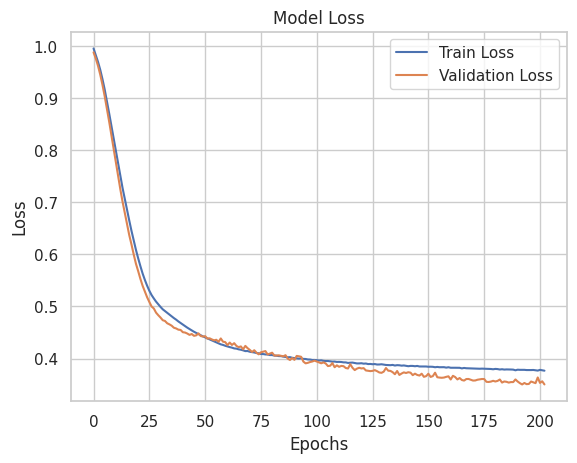

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


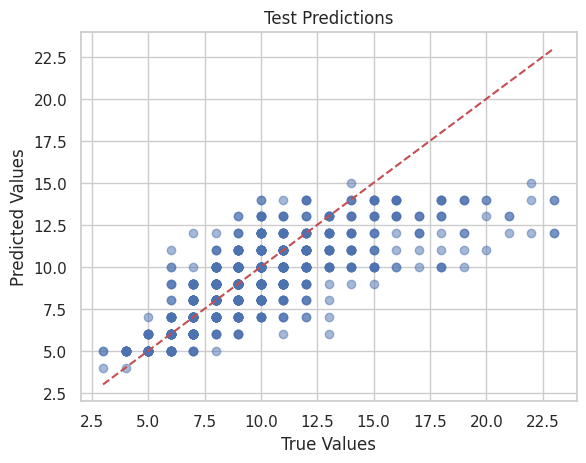

Test MSE: 5.173444976076555
Test R2: 0.5220928781700983


In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
import seaborn as sns
import plotly.graph_objects as go

# Data Loading Function
class DataLoader:
    @staticmethod
    def load_data(file_path):
        return pd.read_csv(file_path)

# Data Preprocessing Function
class DataPreprocessor:
    @staticmethod
    def preprocess(data):
        # Filter Height <= 0.5
        data = data[data['Height'] <= 0.5]

        # Separate target and features
        y = data['Rings']
        X = data.drop(columns=['Rings'])

        # One-hot encode 'Sex'
        encoder = OneHotEncoder()
        sex_encoded = encoder.fit_transform(X[['Sex']]).toarray()
        sex_columns = [f"Sex_{i}" for i in range(sex_encoded.shape[1])]
        X = X.drop(columns=['Sex'])
        X[sex_columns] = sex_encoded

        # Standardize features and target
        scaler_X = StandardScaler()
        scaler_y = StandardScaler()
        X_scaled = scaler_X.fit_transform(X)
        y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

        return X_scaled, y_scaled, scaler_X, scaler_y, X.columns

# Build Predictive Model
def build_model(input_dim):
    model = Sequential([
        Dense(16, activation=LeakyReLU(alpha=0.1), input_dim=input_dim),
        Dropout(0.2),
        Dense(12, activation=LeakyReLU(alpha=0.1)),
        Dense(8, activation='sigmoid'),
        Dense(4, activation='sigmoid'),
        Dense(2, activation='sigmoid'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])
    return model

# Visualization Functions
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

def plot_sankey(model, X, feature_names):
    weights = model.get_weights()
    input_weights = weights[0]  # Weights connecting input layer to first hidden layer

    # Normalize weights for visualization
    normalized_weights = (input_weights - input_weights.min()) / (input_weights.max() - input_weights.min())

    # Prepare data for Sankey diagram
    sources = []
    targets = []
    values = []

    for i, feature in enumerate(feature_names):
        for j in range(normalized_weights.shape[1]):
            sources.append(feature)
            targets.append(f"Neuron {j + 1}")
            values.append(abs(normalized_weights[i, j]))

    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=list(feature_names) + [f"Neuron {i + 1}" for i in range(normalized_weights.shape[1])]
        ),
        link=dict(
            source=[list(feature_names).index(src) for src in sources],
            target=[len(feature_names) + int(tgt.split(' ')[1]) - 1 for tgt in targets],
            value=values
        )
    )])

    fig.update_layout(title_text="Sankey Diagram of Feature Weights", font_size=10)
    fig.show()

# Main Workflow
def main():
    # Load and preprocess data
    data = DataLoader.load_data('abalone.csv')
    X, y, scaler_X, scaler_y, feature_names = DataPreprocessor.preprocess(data)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train model
    model = build_model(X_train.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=250, batch_size=64, callbacks=[early_stopping, model_checkpoint])

    # Plot loss
    plot_loss(history)

    # Evaluate model
    y_train_pred = scaler_y.inverse_transform(model.predict(X_train))
    y_test_pred = scaler_y.inverse_transform(model.predict(X_test))
    y_train_true = scaler_y.inverse_transform(y_train)
    y_test_true = scaler_y.inverse_transform(y_test)

    # Plot predictions
    plot_predictions(y_train_true, y_train_pred, 'Train Predictions')
    plot_predictions(y_test_true, y_test_pred, 'Test Predictions')

    # Plot Sankey diagram for feature weights
    plot_sankey(model, X_train, feature_names)

    print("Train MSE:", mean_squared_error(y_train_true, y_train_pred))
    print("Train R2:", r2_score(y_train_true, y_train_pred))
    print("Test MSE:", mean_squared_error(y_test_true, y_test_pred))
    print("Test R2:", r2_score(y_test_true, y_test_pred))

if __name__ == "__main__":
    main()


In [163]:
y_test_pred_inverse, y_test_inverse

(array([ 9,  8, 14, 11, 13, 10,  9, 11,  7,  9, 13,  7, 13,  6,  8, 14, 12,
        12, 12,  7, 14,  9, 10,  9,  9,  7,  9,  7,  8, 11, 10,  9,  7, 10,
         8,  9,  5,  5,  7,  7, 11, 14, 11,  9, 11, 11, 10,  8, 13,  5,  6,
        14,  9,  5,  6, 11, 10, 13,  9,  8, 13, 11,  9,  7,  7, 10,  5,  7,
         8, 13, 10,  9, 10,  7,  8, 10, 14, 10,  9,  9, 12, 10, 10,  8,  6,
        12,  9,  8, 10, 12, 11, 11, 10, 10, 12,  9,  6,  9,  8,  6, 13,  9,
        11, 14,  9,  8, 10,  8, 10, 10, 14,  8, 12,  8, 11,  5,  9,  9, 12,
        12, 10, 10,  9, 11, 10, 13,  9,  9,  9, 13,  8,  8, 10,  5,  5,  8,
         9, 10,  7, 12,  9,  9,  8,  8, 10, 11, 12, 14,  8, 11,  9, 11,  9,
         9,  8, 10, 13,  6,  8,  5,  9,  5,  9, 13,  7,  9, 14,  9, 10,  9,
        10, 11,  9,  8,  7,  8,  9, 13,  9, 10, 10,  7,  7,  8,  7, 13,  8,
        10, 10,  5,  8, 10, 14, 10, 11, 10, 14, 13, 11,  9,  8, 10, 13, 11,
         8, 11, 10,  9,  8,  9,  5, 10, 12,  6, 10, 11, 10,  6,  9, 13, 13,
        10, 

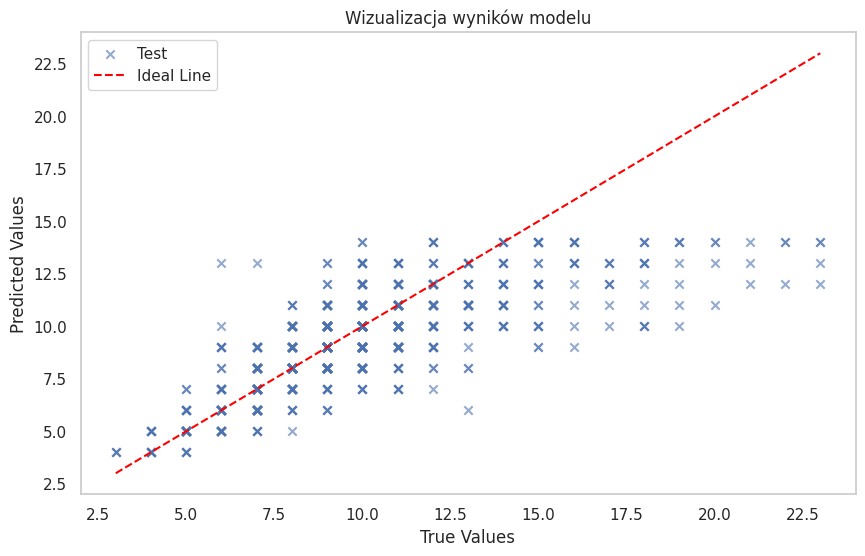

In [174]:
# Wykres punktowy: wartości prawdziwe vs przewidywane
plt.figure(figsize=(10, 6))

# Dane testowe
plt.scatter(y_test_inverse, y_test_pred_inverse, label="Test", alpha=0.6, marker='x')

# Linia idealna
min_value =  y_test_inverse.min()
max_value = y_test_inverse.max()
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label="Ideal Line")

# Dostosowanie wykresu
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Wizualizacja wyników modelu")
plt.legend()
plt.grid()
plt.show()

In [175]:
from sklearn.metrics import mean_squared_error, r2_score

# Metryki dla danych testowych
mse_test = mean_squared_error(y_test_inverse, y_test_pred_inverse)
r2_test = r2_score(y_test_inverse, y_test_pred_inverse)

print(f"Test MSE: {np.sqrt(mse_test):.4f}, Test R2: {r2_test:.4f}")

Test MSE: 2.2371, Test R2: 0.5377


In [30]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=17ea6b2f5a12a47c1ff3f62c23037f724e16102fdb0c33b703babc485c69f8f1
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


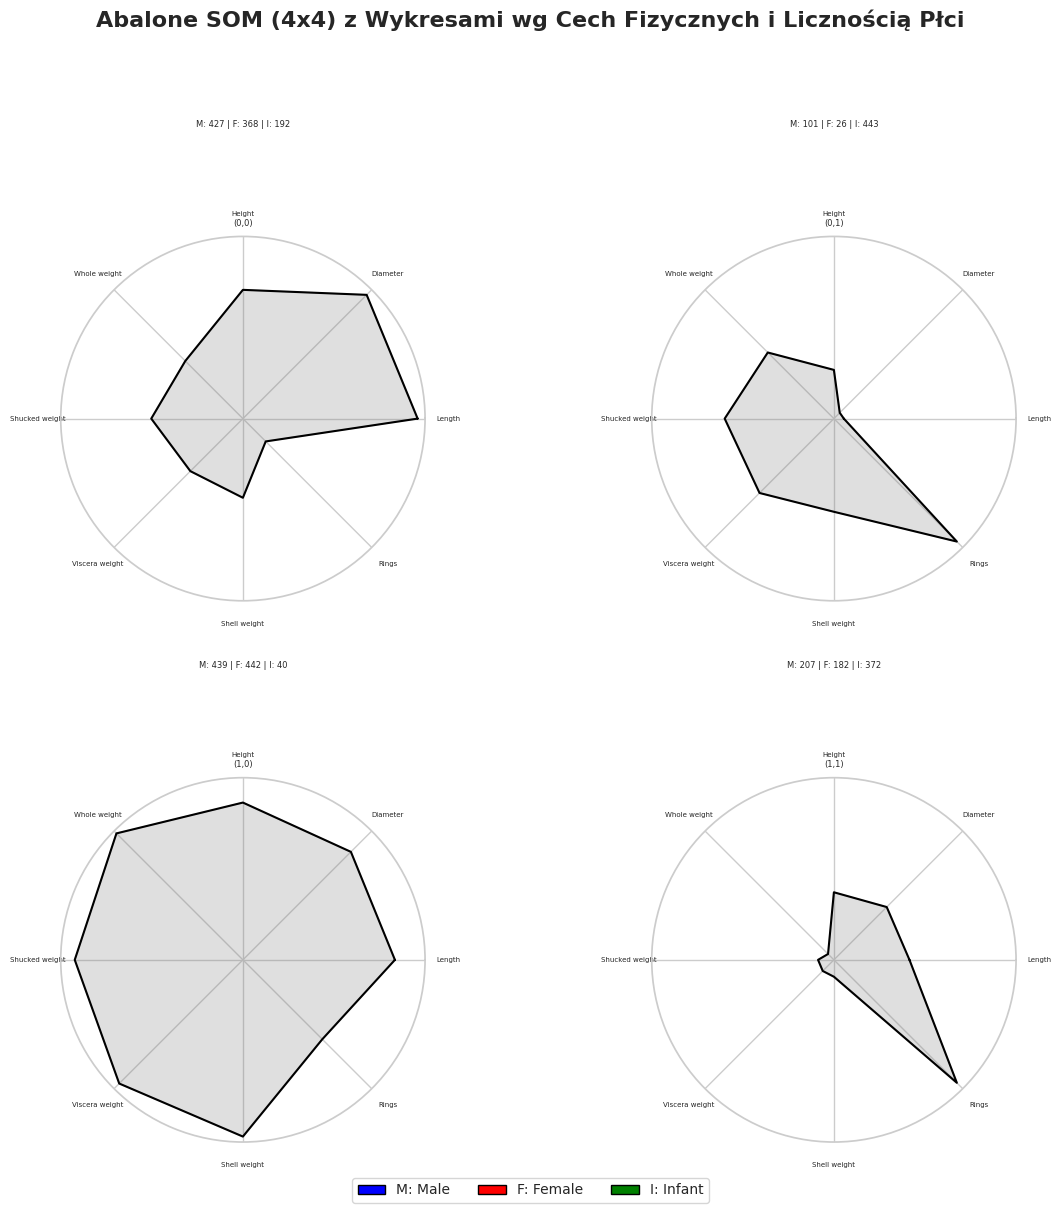

In [31]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Wybór istotnych cech (bez płci)
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
sex_column = 'Sex'  # Kolumna z płcią

# Dane i normalizacja
data = eda[features].values  # Dane tylko z cech fizycznych
sex_data = eda[sex_column].values  # Dane o płci (do analizy, ale nie do treningu)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Parametry SOM
som_x, som_y = 2, 2  # Rozmiar siatki
som = MiniSom(x=som_x, y=som_y, input_len=len(features), sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(normalized_data)
som.train_random(normalized_data, num_iteration=1000)

# Funkcja do przygotowania danych dla SOM
def prepare_som_data(som, data, sex_data, num_features):
    som_data = {}
    som_counts = {}
    for x in range(som_x):
        for y in range(som_y):
            node_id = (x, y)
            cluster_indices = np.array([som.winner(row) == node_id for row in data])
            cluster_data = data[cluster_indices]
            cluster_sex = sex_data[cluster_indices]

            if len(cluster_data) > 0:
                som_data[node_id] = np.mean(cluster_data, axis=0)  # Średnie wartości cech
                unique, counts = np.unique(cluster_sex, return_counts=True)
                som_counts[node_id] = dict(zip(unique, counts))  # Liczność dla każdej płci
            else:
                som_data[node_id] = np.zeros(num_features)  # Węzły bez danych
                som_counts[node_id] = {'M': 0, 'F': 0, 'I': 0}
    return som_data, som_counts

# Dane dla wizualizacji
som_data, som_counts = prepare_som_data(som, normalized_data, sex_data, len(features))

# Wizualizacja SOM
def som_visualization(data, counts, grid_size=(4, 4)):
    # Przygotowanie wykresu
    fig, axes = plt.subplots(grid_size[0], grid_size[1], subplot_kw=dict(polar=True), figsize=(12, 12))
    fig.suptitle("Abalone SOM (4x4) z Wykresami wg Cech Fizycznych i Licznością Płci", fontsize=16, weight='bold')

    # Przygotowanie radarów
    num_vars = len(features)  # Liczba cech na węzeł
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    theta += theta[:1]

    colors = {'M': 'blue', 'F': 'red', 'I': 'green'}  # Kolory dla płci

    # Iteracja przez węzły SOM
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            ax = axes[i, j]

            # Dane dla danego węzła
            node_id = (i, j)
            metrics = data.get(node_id, np.zeros(num_vars))
            group_counts = counts.get(node_id, {'M': 0, 'F': 0, 'I': 0})

            # Rysowanie jednego wielokąta (średnie wartości cech w węźle)
            values = np.concatenate([metrics, metrics[:1]])  # Zamknięcie koła
            ax.fill(theta, values, alpha=0.25, color='gray')
            ax.plot(theta, values, color='black')

            # Dodanie liczności nad tytułem
            count_text = f"M: {group_counts.get('M', 0)} | F: {group_counts.get('F', 0)} | I: {group_counts.get('I', 0)}"
            ax.text(0.5, 1.3, count_text, transform=ax.transAxes, ha='center', fontsize=6)

            # Dodanie tytułu węzła
            ax.set_title(f"({i},{j})", va='bottom', fontsize=6)

            # Ustawienie osi
            ax.set_xticks(theta[:-1])
            ax.set_xticklabels(features, fontsize=5)
            ax.set_yticks([])

    # Legenda
    legend_elements = [
        Patch(facecolor='blue', edgecolor='black', label='M: Male'),
        Patch(facecolor='red', edgecolor='black', label='F: Female'),
        Patch(facecolor='green', edgecolor='black', label='I: Infant')
    ]
    fig.legend(handles=legend_elements, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02), fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Wizualizacja
som_visualization(som_data, som_counts, grid_size=(som_x, som_y))
